In [1]:
!pip install xgboost catboost pandas scikit-learn gradio scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
!pip install scikit-learn gradio

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


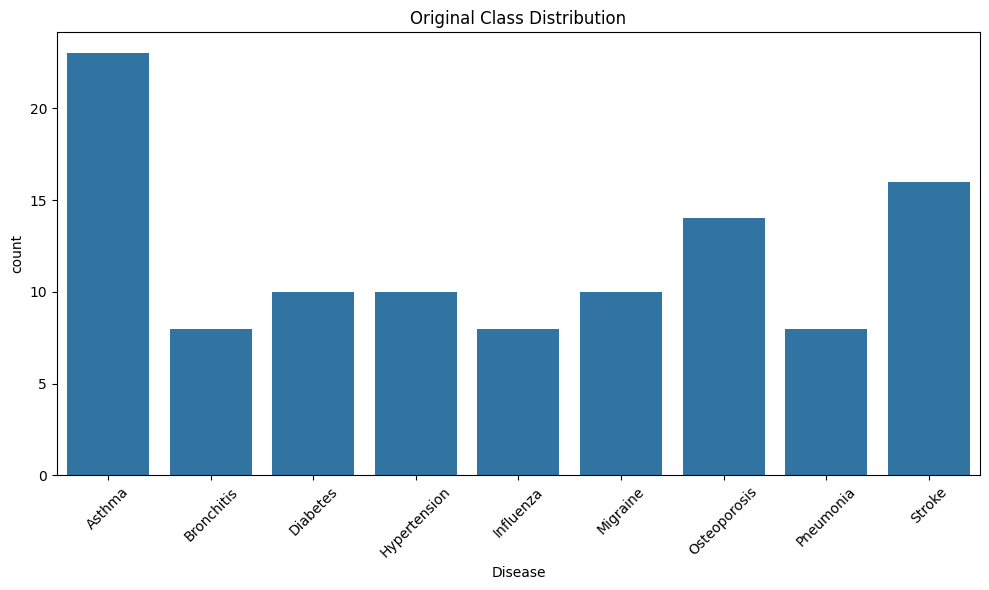

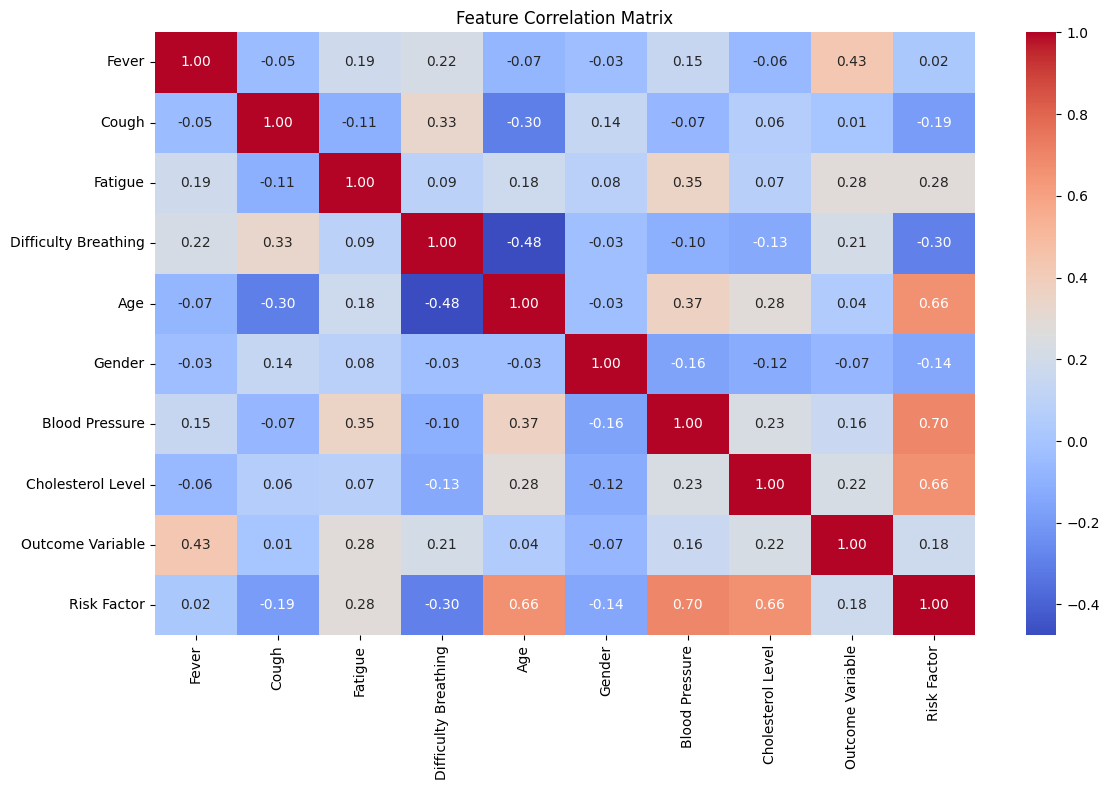

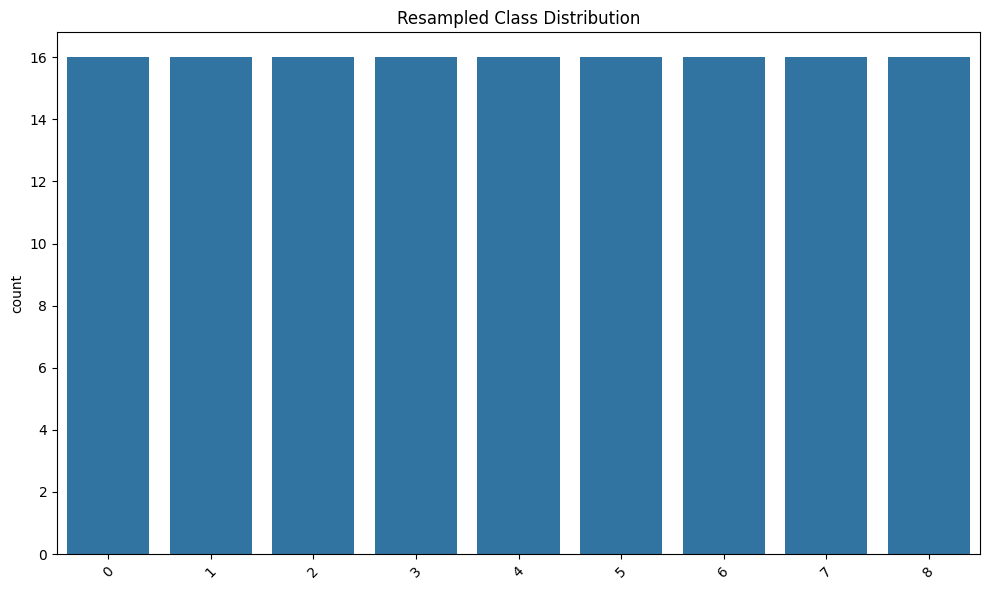

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.1515
Random Forest Accuracy: 0.3030


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.3333
CatBoost Accuracy: 0.4545
SVM Accuracy: 0.2424
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 10
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [W

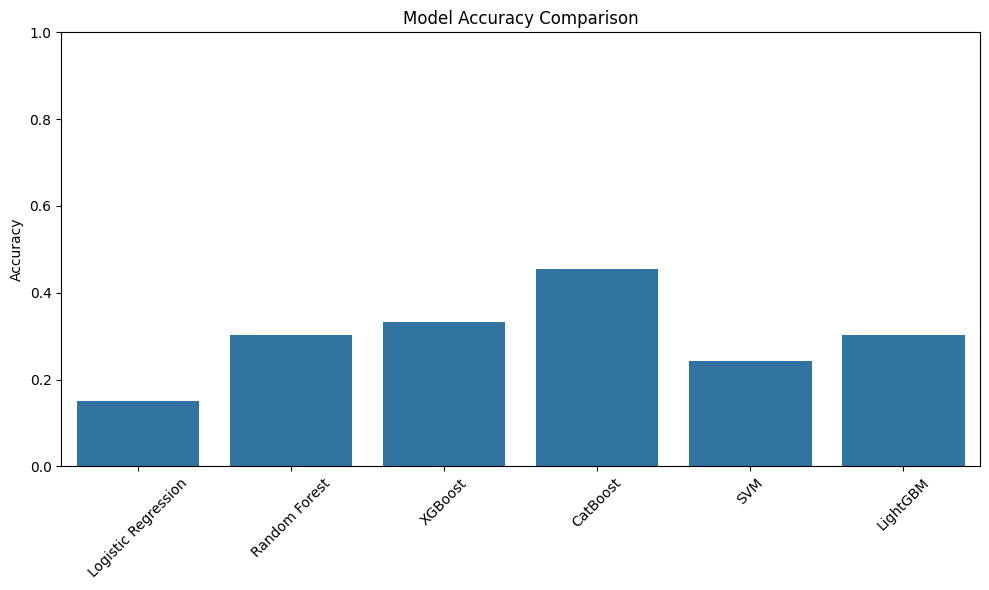

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://72ea605cc5f2f854f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
!pip install scikit-learn gradio
!pip install xgboost catboost pandas scikit-learn gradio scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import gradio as gr
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def load_and_preprocess_data(data_path):
    df = pd.read_excel(data_path)

    # Convert numerical columns explicitly
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0)

    # Enhanced encoding with type conversion
    binary_mapping = {'Yes': 1, 'No': 0}
    categorical_mapping = {
        'Gender': {'Male': 0, 'Female': 1},
        'Blood Pressure': {'Low': 0, 'Normal': 1, 'High': 2},
        'Cholesterol Level': {'Low': 0, 'Normal': 1, 'High': 2},
     'Outcome Variable': {'Positive': 1, 'Negative': 0}

    }

    # Apply binary encoding
    binary_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
    for col in binary_cols:
        df[col] = df[col].map(binary_mapping).astype(np.int8)

    # Apply categorical encoding
    for col, mapping in categorical_mapping.items():
        df[col] = df[col].map(mapping).astype(np.int8)

    # Create risk factor with proper numeric types
    df['Risk Factor'] = (
        (df['Age'] > 60).astype(np.int8) * 2 +
        (df['Blood Pressure'] == 2).astype(np.int8) * 2 +
        (df['Cholesterol Level'] == 2).astype(np.int8) * 2
    )

    # Ensure numeric types
    numeric_cols = ['Age', 'Risk Factor']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Filter diseases with sufficient samples
    min_samples = 10
    disease_counts = df['Disease'].value_counts()
    valid_diseases = disease_counts[disease_counts >= min_samples].index
    df = df[df['Disease'].isin(valid_diseases)]

    return df

def train_disease_prediction_model(df):
    # Separate features and target
    X = df.drop(columns=['Disease'])
    y = df['Disease']

    # Encode target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split data with stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=0.2,
        random_state=42,
        stratify=y_encoded
    )

    # Create preprocessing pipeline
    numeric_features = ['Age', 'Risk Factor']
    categorical_features = ['Gender', 'Blood Pressure', 'Cholesterol Level']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )

    # Define models with hyperparameter tuning
    models = {
        'XGBoost': XGBClassifier(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.1,
            use_label_encoder=False,
            eval_metric='mlogloss'
        ),
        'RandomForest': RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            class_weight='balanced'
        ),
        'CatBoost': CatBoostClassifier(
            iterations=500,
            learning_rate=0.05,
            depth=6,
            silent=True
        )
    }

    # Train and evaluate models
    best_accuracy = 0
    best_model = None
    for name, model in models.items():
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42, k_neighbors=3)),
            ('classifier', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = pipeline

        print(f"{name} Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    return best_model, label_encoder

def predict_diseases(age, gender, fever, cough, fatigue, difficulty_breathing,
                    blood_pressure, cholesterol, model, label_encoder):
    try:
        # Create input DataFrame with proper typing
        input_data = pd.DataFrame({
            'Age': [int(age)],
            'Gender': [0 if gender == 'Male' else 1],
            'Fever': [1 if fever == 'Yes' else 0],
            'Cough': [1 if cough == 'Yes' else 0],
            'Fatigue': [1 if fatigue == 'Yes' else 0],
            'Difficulty Breathing': [1 if difficulty_breathing == 'Yes' else 0],
            'Blood Pressure': [0 if blood_pressure == 'Low' else (1 if blood_pressure == 'Normal' else 2)],
            'Cholesterol Level': [0 if cholesterol == 'Low' else (1 if cholesterol == 'Normal' else 2)],
            'Risk Factor': [
                (int(age) > 60) * 2 +
                (blood_pressure == 'High') * 2 +
                (cholesterol == 'High') * 2
            ]
        })

        # Make prediction
        probs = model.predict_proba(input_data)[0]
        results = sorted(zip(label_encoder.classes_, probs),
                        key=lambda x: x[1], reverse=True)[:5]

        return ", ".join([f"{disease} ({prob*100:.2f}%)" for disease, prob in results])

    except Exception as e:
        return f"Prediction Error: {str(e)}"


def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

def plot_model_performance(model_results):
    plt.figure(figsize=(10, 6))
    models = list(model_results.keys())
    accuracies = [model_results[m]['accuracy'] for m in models]
    sns.barplot(x=models, y=accuracies)
    plt.title('Model Accuracy Comparison')
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def load_and_preprocess_data(data_path):
    df = pd.read_excel(data_path)

    # Handle binary features
    binary_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
    df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

    # Handle categorical features
    categorical_mappings = {
        'Gender': {'Male': 0, 'Female': 1},
        'Blood Pressure': {'Low': 0, 'Normal': 1, 'High': 2},
        'Cholesterol Level': {'Low': 0, 'Normal': 1, 'High': 2},
        'Outcome Variable': {'Positive': 1, 'Negative': 0}
    }
    for col, mapping in categorical_mappings.items():
        df[col] = df[col].map(mapping)

    # Create risk factor
    df['Risk Factor'] = (
        (df['Age'] > 60).astype(int) +
        (df['Blood Pressure'] == 2).astype(int) +
        (df['Cholesterol Level'] == 2).astype(int)
    )

    # Filter rare diseases with dynamic minimum samples calculation
    test_size = 0.3
    min_neighbors = 5
    min_samples = int(np.ceil(min_neighbors / (1 - test_size)))
    disease_counts = df['Disease'].value_counts()
    valid_diseases = disease_counts[disease_counts >= min_samples].index
    df = df[df['Disease'].isin(valid_diseases)]

    # Visualizations
    plot_class_distribution(df['Disease'], 'Original Class Distribution')
    plot_correlation_matrix(df.drop(columns=['Disease']))

    return df

def train_disease_prediction_model(df):
    # Prepare data
    X = df.drop(columns=['Disease'])
    y = df['Disease']

    # Encode target
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
    )

    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = ['Age', 'Risk Factor']
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    # Apply adaptive SMOTE
    class_counts = np.bincount(y_train)
    min_samples = min(class_counts)
    k_neighbors = min(5, min_samples - 1) if min_samples > 1 else 1

    sm = SMOTE(
        random_state=42,
        k_neighbors=k_neighbors,
        sampling_strategy='not majority'
    )

    try:
        X_train, y_train = sm.fit_resample(X_train, y_train)
        plot_class_distribution(y_train, 'Resampled Class Distribution')
    except ValueError as e:
        print(f"SMOTE Error: {e}. Using original distribution.")
        pass

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'CatBoost': CatBoostClassifier(silent=True, random_state=42),
        'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
        'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
    }

    # Train and evaluate
    model_results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_results[name] = {'model': model, 'accuracy': accuracy}
        print(f"{name} Accuracy: {accuracy:.4f}")

    plot_model_performance(model_results)

    # Get best model
    best_model_name = max(model_results, key=lambda x: model_results[x]['accuracy'])
    return model_results[best_model_name]['model'], scaler, X.columns.tolist(), numerical_cols, label_encoder

def predict_diseases(age, gender, fever, cough, fatigue, difficulty_breathing,
                    blood_pressure, cholesterol, model, scaler, feature_names,
                    numerical_cols, label_encoder):
    try:
        # Create input dataframe
        input_data = pd.DataFrame([{
            'Age': age,
            'Gender': 0 if gender == 'Male' else 1,
            'Fever': 1 if fever == 'Yes' else 0,
            'Cough': 1 if cough == 'Yes' else 0,
            'Fatigue': 1 if fatigue == 'Yes' else 0,
            'Difficulty Breathing': 1 if difficulty_breathing == 'Yes' else 0,
            'Blood Pressure': 0 if blood_pressure == 'Low' else (1 if blood_pressure == 'Normal' else 2),
            'Cholesterol Level': 0 if cholesterol == 'Low' else (1 if cholesterol == 'Normal' else 2),
            'Risk Factor': (age > 60) + (blood_pressure == 'High') + (cholesterol == 'High')
        }], columns=feature_names)

        # Scale numerical features
        input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])

        # Get predictions
        probs = model.predict_proba(input_data)[0]
        results = sorted(zip(label_encoder.classes_, probs),
                        key=lambda x: x[1], reverse=True)[:5]

        return ", ".join([f"{disease} ({prob*100:.2f}%)" for disease, prob in results])

    except Exception as e:
        return f"Error: {str(e)}"

def main():
    # Load and preprocess data
    df = load_and_preprocess_data('/content/disease_symptom_and_patient_profile_dataset_2.xlsx')

    # Train model
    model, scaler, features, num_cols, encoder = train_disease_prediction_model(df)

    # Create Gradio interface
    inputs = [
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Radio(["Yes", "No"], label="Fever"),
        gr.Radio(["Yes", "No"], label="Cough"),
        gr.Radio(["Yes", "No"], label="Fatigue"),
        gr.Radio(["Yes", "No"], label="Difficulty Breathing"),
        gr.Radio(["Low", "Normal", "High"], label="Blood Pressure"),
        gr.Radio(["Low", "Normal", "High"], label="Cholesterol Level")
    ]

    iface = gr.Interface(
        fn=lambda *args: predict_diseases(*args, model, scaler, features, num_cols, encoder),
        inputs=inputs,
        outputs="text",
        title="Disease Prediction System",
        description="Predict top 5 likely diseases based on patient symptoms and profile"
    )

    iface.launch()

if __name__ == "__main__":
    main()